In [11]:
from sympy import exp
from sympy import Symbol, S
import math

In [14]:
x = Symbol("x")
a = 1/(1+math.exp(-4))
a

0.9820137900379085

In [15]:
# попробуем найти производную для функции
# по переменной а
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**8 + c**2*b

print(diff(f, a))

8*a**7 + 5*b - cos(c)


In [18]:
# решить систему уравнений
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(3*x**2+3*y**2-15,0)
eq2 = Eq(6*x*y-12, 0)
 
sol = solve([eq1, eq2], [x, y])
sol

[(-2, -1), (-1, -2), (1, 2), (2, 1)]

## Оптимизация

In [19]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

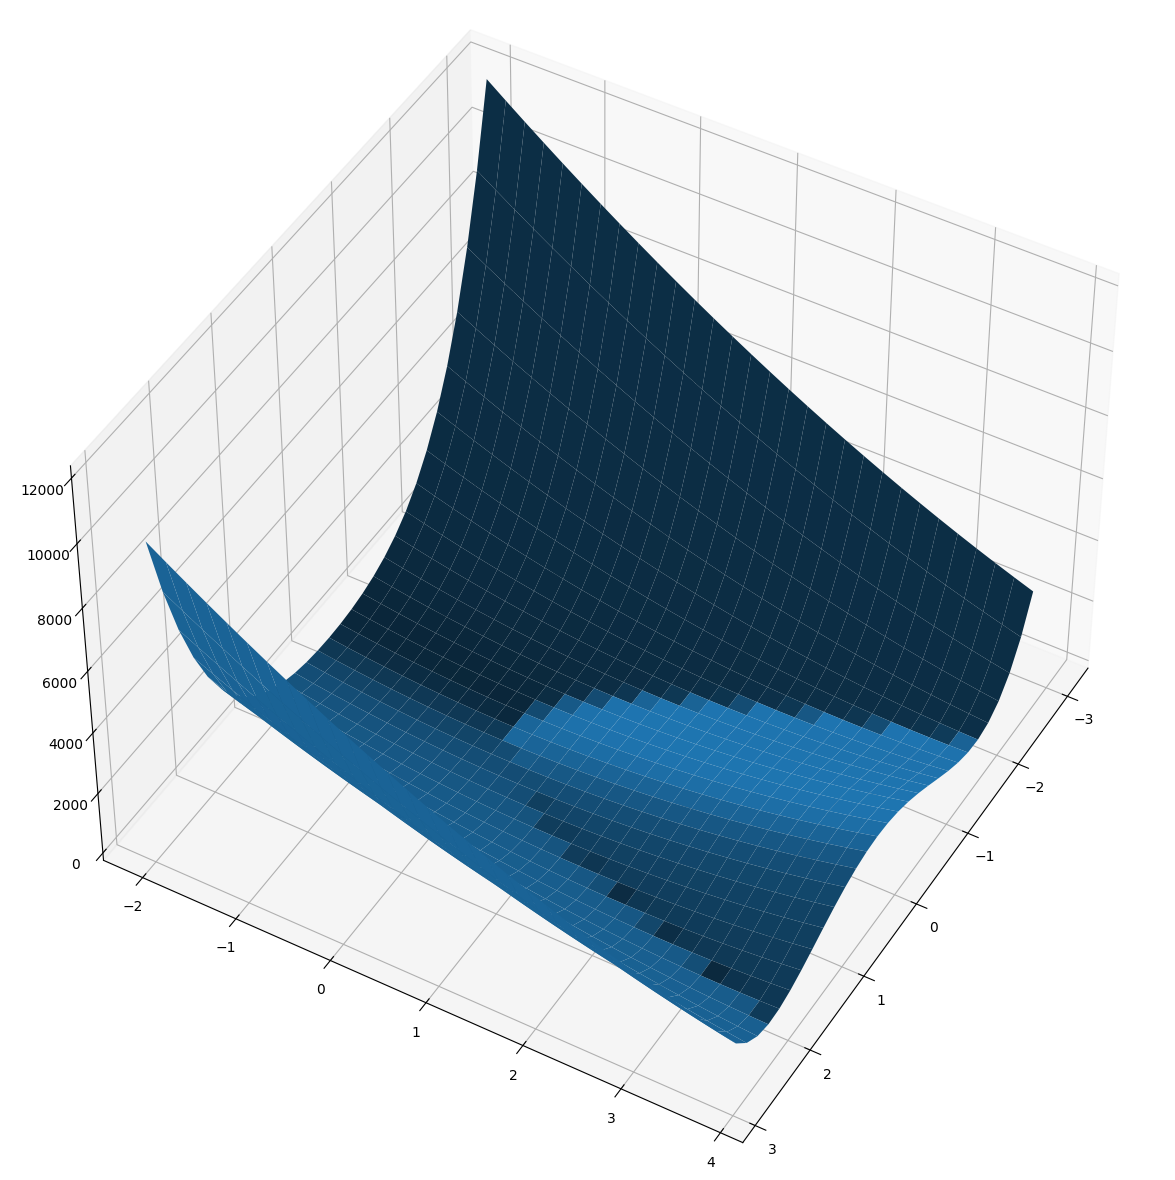

In [20]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

In [21]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


In [22]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


In [29]:
from scipy.optimize import minimize, least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = least_squares(func_rosen, x1)
print(result_point.x.round(3))

[0.939 0.882 0.776 0.603 0.361]


## Условные экстремумы. Метод Лагранжа

In [58]:
# пример 3
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))
sols

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


{a: 2003/16, b: 1197/16, w: -6017/8}

In [80]:
from sympy import *

x,y,w=symbols(' x y w' )
g = ((x-2)**2 + (y-1)**2)**(0.5)
print('Целевая функция для аргументов a и b :\n f = ', g)
q = x + y -1
print('Функция ограничений: ', q,'= 0')
f = ((x-2)**2 + (y-1)**2)**(0.5) + w*(x + y -1)
print('Функция Лагранжа :\n ',f)
fx = f.diff(x)
print('df/da =',fx,'= 0')
fy = f.diff(y)
print('df/db =',fy,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fx,fy,fw])
print('Стационарная точка M(x,y):\n',float(sols[0][x]),',',float(sols[0][y]))
((sols[0][x] - 2)**2 + (sols[0][y] - 1)**2)

Целевая функция для аргументов a и b :
 f =  ((x - 2)**2 + (y - 1)**2)**0.5
Функция ограничений:  x + y - 1 = 0
Функция Лагранжа :
  w*(x + y - 1) + ((x - 2)**2 + (y - 1)**2)**0.5
df/da = w + (1.0*x - 2.0)/((x - 2)**2 + (y - 1)**2)**0.5 = 0
df/db = w + (1.0*y - 1.0)/((x - 2)**2 + (y - 1)**2)**0.5 = 0
df/dw = x + y - 1 = 0
Стационарная точка M(x,y):
 1.0 , 0.0


2.00000000000000

In [97]:
from sympy import *

a,b,c,w=symbols(' a b c w' )
f = 2*a*b + 2*b*c + 2*c*a + w*(a*b*c - 1)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fc = f.diff(c)
print('df/db =',fc,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fc,fw])[0]
sols

Функция Лагранжа :
  2*a*b + 2*a*c + 2*b*c + w*(a*b*c - 1)
df/da = b*c*w + 2*b + 2*c = 0
df/db = a*c*w + 2*a + 2*c = 0
df/db = a*b*w + 2*a + 2*b = 0
df/dw = a*b*c - 1 = 0


{a: 1, b: 1, c: 1, w: -4}

In [98]:
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols

# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
C:\Users\anzel\AppData\Local\Temp\ipykernel_15280\3823877321.py:9: SyntaxWarning: invalid escape sequence '\l'
  "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True


## Градиент и антиградиент

In [103]:
import numpy as np

f = np.array([3, 7, 14, 23, 36, 47], dtype=float)
 
np.gradient(f)

print(f[1] - f[0], f[-1] - f[-2])

4.0 11.0


In [105]:
np.gradient(f, 2)

# array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))

2.75
4.0
5.5
6.0


In [107]:
x,y=symbols(' x y' )
f = (2.1-x-y)**2+(2.9-x-3*y)**2+(4.1-x-5*y)**2
print('Функция Лагранжа :\n ',f)
fx = f.diff(x)
print('df/da =',fx,'= 0')
fy = f.diff(y)
print('df/db =',fy,'= 0')
sols = solve([fx,fy])
sols

Функция Лагранжа :
  4.41*(-0.476190476190476*x - 0.476190476190476*y + 1)**2 + 9*(-x/3 - y + 0.966666666666667)**2 + 25*(-x/5 - y + 0.82)**2
df/da = 6.0*x + 18.0*y - 18.2 = 0
df/db = 18.0*x + 70.0*y - 62.6 = 0


In [111]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

### Градиентный спуск

In [112]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [113]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [114]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [115]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

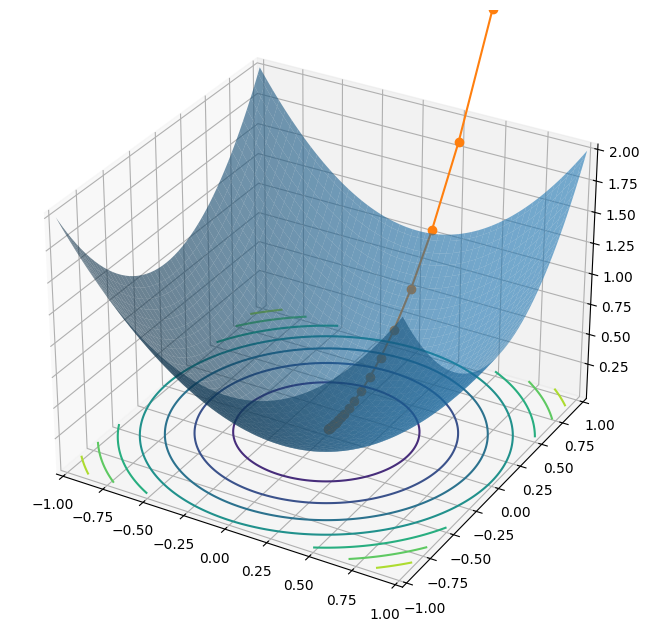

In [116]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

In [14]:
from sympy import *
x=symbols('x')
f = -x**4 + 6*x**3 - 4*x**2 + 80
fx = diff(f)
sols = solve(fx)
sols
x1 = sols[0]
x2 = sols[1]
x3 = sols[2]
f1 = -x1**4 + 6*x1**3 - 4*x1**2 + 80
f2 = -x2**4 + 6*x2**3 - 4*x2**2 + 80
f3 = -x3**4 + 6*x3**3 - 4*x3**2 + 80
f1, f2, f3

(80, 1275/16, 144)

In [16]:
x, y, w=symbols('x y w')
f = x**2 + 2*y**2 + w*(x + y - 20)
fx = diff(f, x)
fy = diff(f, y)
fw = diff(f, w)
sols = solve([fx, fy, fw])
xs = sols[x]
ys = sols[y]
xs**2 + 2*ys**2

800/3